<h1><center>Recurrent Neural Network in PyTorch</center></h1>

In [1]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
%matplotlib inline

#### 2.1 Declaring a tensor `x` <a id=3></a>

In [2]:
x = torch.linspace(0,799,800)

#### 2.2 Creating a tensor `y` as a sin function of `x` <a id=4></a>

In [3]:
y = torch.sin(x*2*3.1416/40)

#### 2.3 Plotting `y` <a id=5></a>

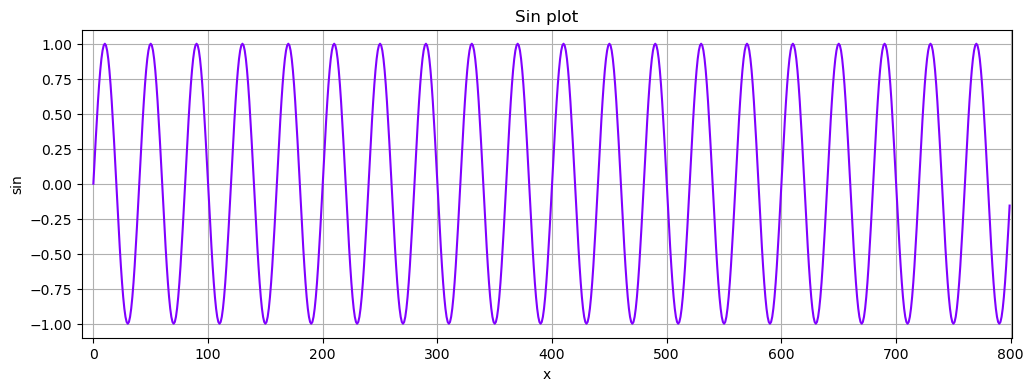

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(y.numpy(),color='#8000ff')
plt.show()

### 3. Batching the data <a id=6></a>
[back to top](#100)

#### 3.1 Splitting the data in train/test set <a id=7></a>

In [5]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

##### 3.1.1 Plotting the training/testing set

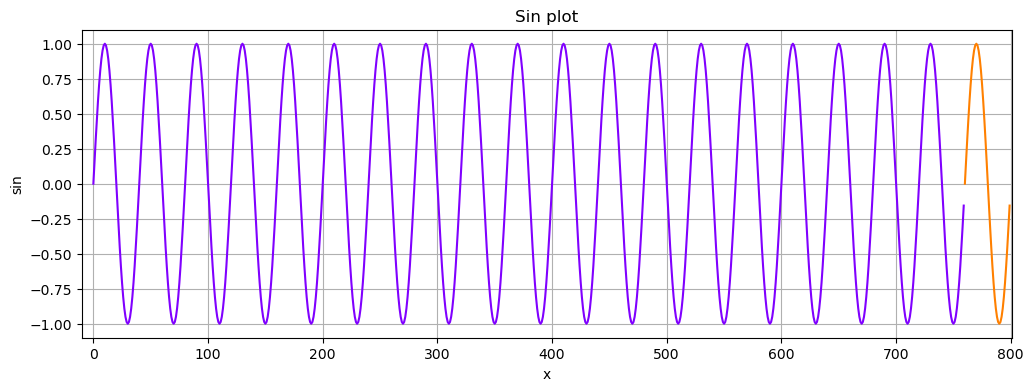

In [6]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.xlabel("x")
plt.ylabel("sin")
plt.title("Sin plot")
plt.plot(train_set.numpy(),color='#8000ff')
plt.plot(range(760,800),test_set.numpy(),color="#ff8000")
plt.show()

#### 3.2 Creating the batches of data <a id=8></a>

While working with LSTM models, we divide the training sequence into series of overlapping windows. The label used for comparison is the next value in the sequence.

For example if we have series of of 12 records and a window size of 3, we feed [x1, x2, x3] into the model, and compare the prediction to `x4`. Then we backdrop, update parameters, and feed [x2, x3, x4] into the model and compare the prediction to `x5`. To ease this process, I'm defining a function `input_data(seq,ws)` that created a list of (seq,labels) tuples. If `ws` is the window size, then the total number of (seq,labels) tuples will be `len(series)-ws`.

In [7]:
def input_data(seq,ws):
    out = []
    L = len(seq)
    
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    
    return out

##### 3.2.1 Calling the `input_data` function
The length of `x` = 800

The length of `train_set` = 800 - 40 = 760

The length of `train_data` = 760 - 40 = 720

In [8]:
window_size = 40
train_data = input_data(train_set, window_size)
len(train_data)

720

##### 3.2.2 Checking the 1st value from train_data

In [9]:
train_data[0]

(tensor([ 0.0000e+00,  1.5643e-01,  3.0902e-01,  4.5399e-01,  5.8779e-01,
          7.0711e-01,  8.0902e-01,  8.9101e-01,  9.5106e-01,  9.8769e-01,
          1.0000e+00,  9.8769e-01,  9.5106e-01,  8.9100e-01,  8.0901e-01,
          7.0710e-01,  5.8778e-01,  4.5398e-01,  3.0901e-01,  1.5643e-01,
         -7.2400e-06, -1.5644e-01, -3.0902e-01, -4.5400e-01, -5.8779e-01,
         -7.0711e-01, -8.0902e-01, -8.9101e-01, -9.5106e-01, -9.8769e-01,
         -1.0000e+00, -9.8769e-01, -9.5105e-01, -8.9100e-01, -8.0901e-01,
         -7.0710e-01, -5.8777e-01, -4.5398e-01, -3.0900e-01, -1.5642e-01]),
 tensor([1.4480e-05]))

### 4. Defining the model <a id=9></a>
[back to top](#100)

#### 4.1 Model Class <a id=10></a>

In [10]:
class LSTM(nn.Module):
    
    def __init__(self,input_size = 1, hidden_size = 5, out_size = 1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size,out_size)
        self.hidden = (torch.zeros(1,1,hidden_size),torch.zeros(1,1,hidden_size))
    
    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]


#### 4.2 Model Instantiation <a id = 11></a>

In [11]:
torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

##### 4.2.1 Printing the model

In [12]:
model

LSTM(
  (lstm): LSTM(1, 5)
  (linear): Linear(in_features=5, out_features=1, bias=True)
)

#### 4.3 Training <a id = 12></a>

During training, I'm visualising the prediction process for the test data on the go. It will give a better understanding of how the training is being carried out in each epoch. The training sequence is represented in <span style="color:#8000ff">purple</span> while the predicted sequence in represented in <span style="color:#ff8000">orange</span>.

Epoch 0 Loss: 0.12942536175251007
Performance on test range: 0.7674689292907715


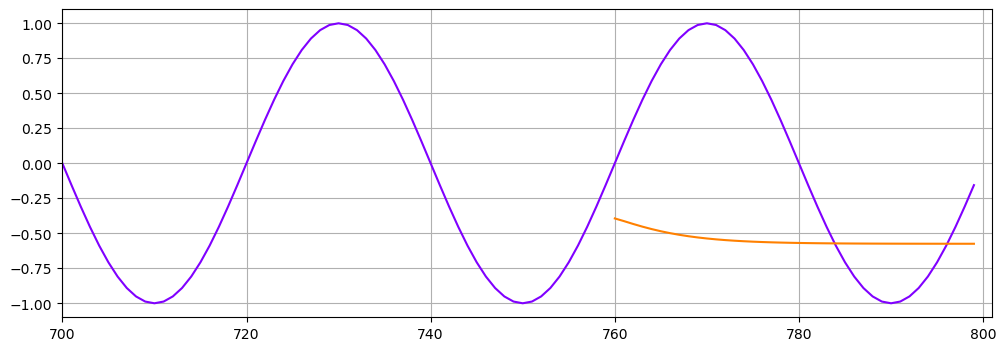

Epoch 1 Loss: 0.09740830212831497
Performance on test range: 0.6885029077529907


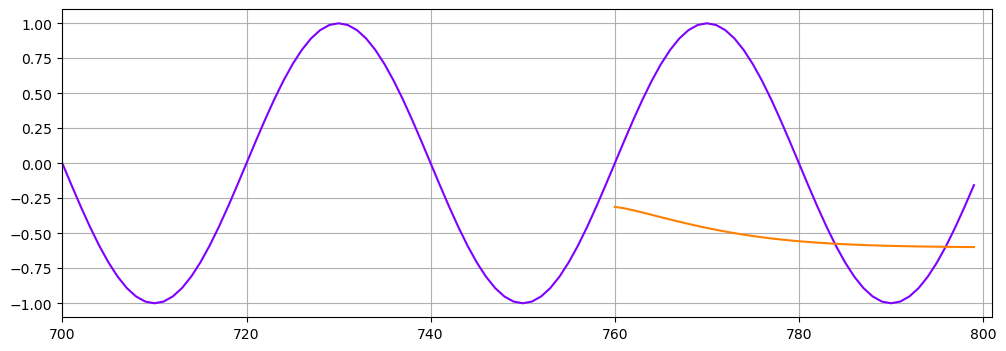

Epoch 2 Loss: 0.07190170884132385
Performance on test range: 0.5813108682632446


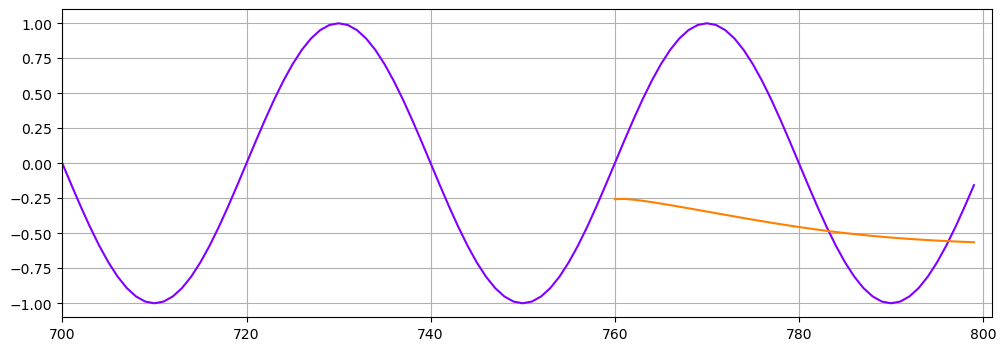

Epoch 3 Loss: 0.053768035024404526
Performance on test range: 0.5131558179855347


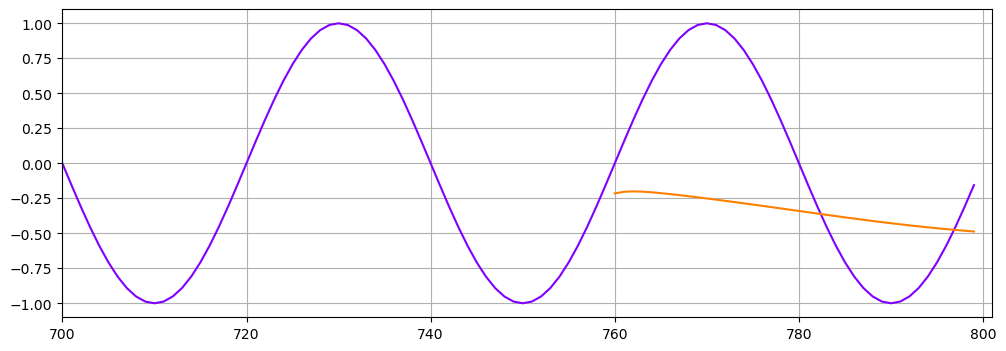

Epoch 4 Loss: 0.03865404054522514
Performance on test range: 0.46723324060440063


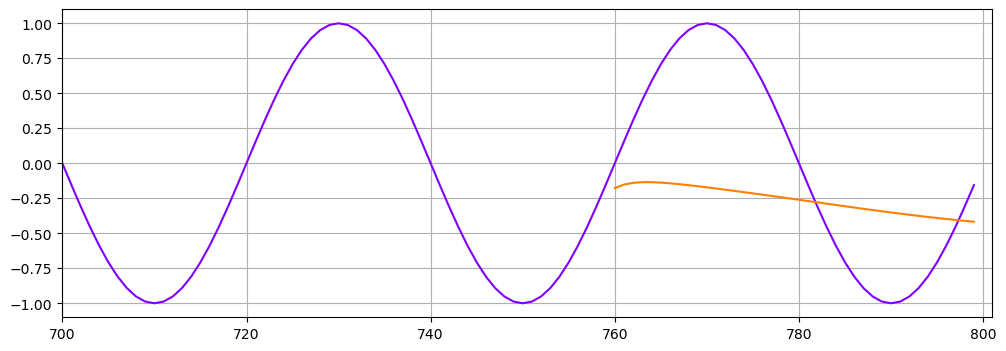

Epoch 5 Loss: 0.024500342085957527
Performance on test range: 0.39696937799453735


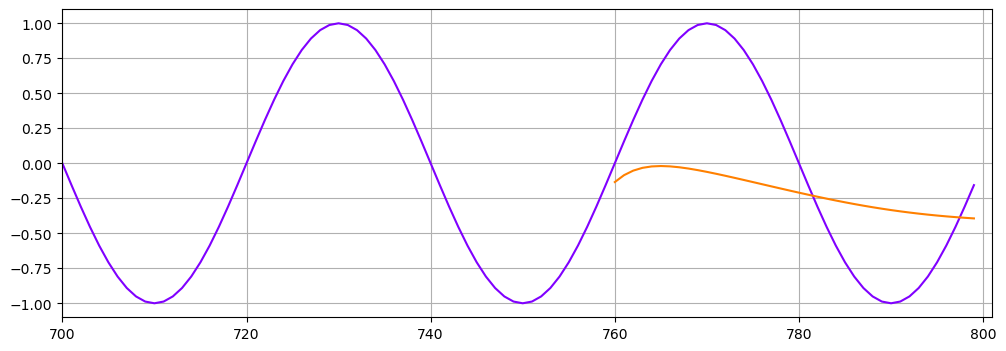

Epoch 6 Loss: 0.011708668433129787
Performance on test range: 0.26700061559677124


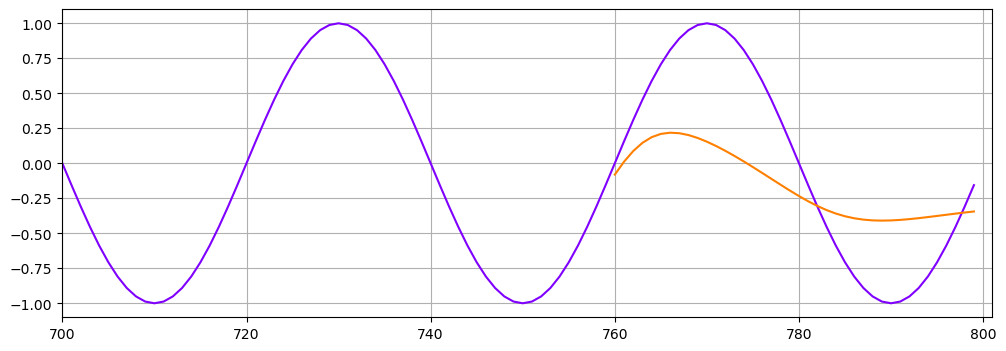

Epoch 7 Loss: 0.003493556985631585
Performance on test range: 0.18465851247310638


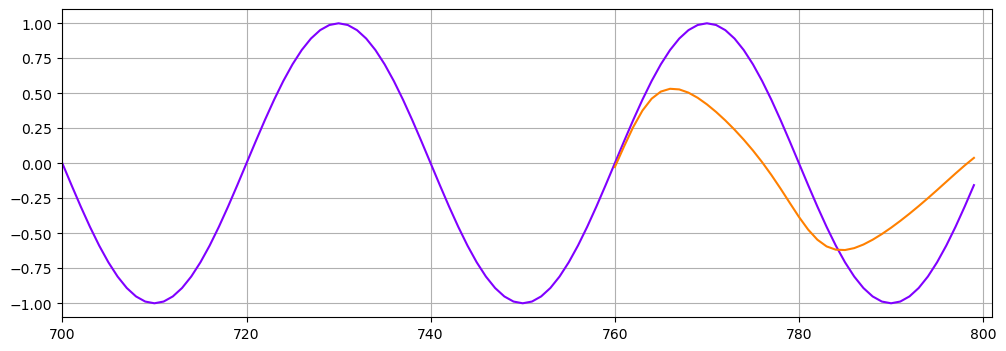

Epoch 8 Loss: 0.000580391613766551
Performance on test range: 0.1337338387966156


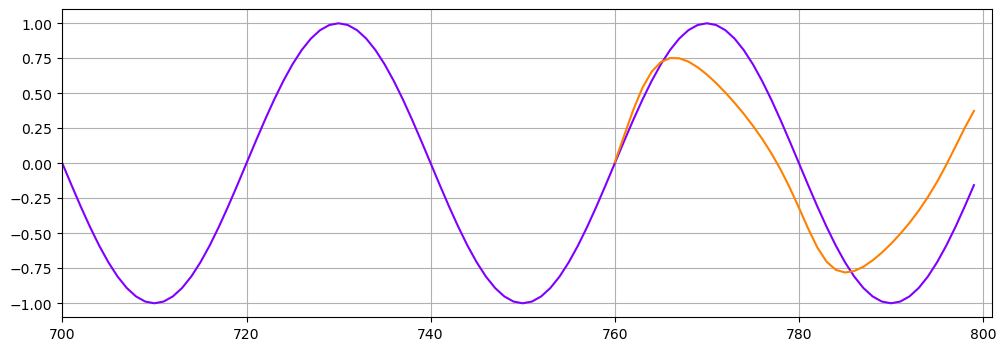

Epoch 9 Loss: 2.714018955884967e-05
Performance on test range: 0.08566563576459885


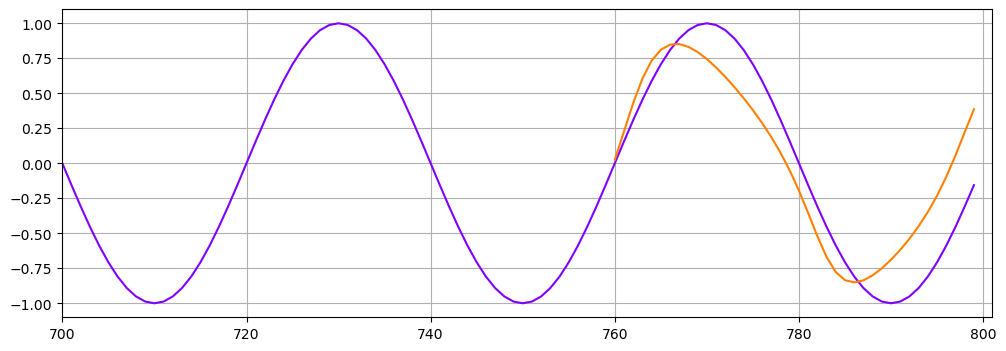

Epoch 10 Loss: 2.0223067622282542e-05
Performance on test range: 0.06693222373723984


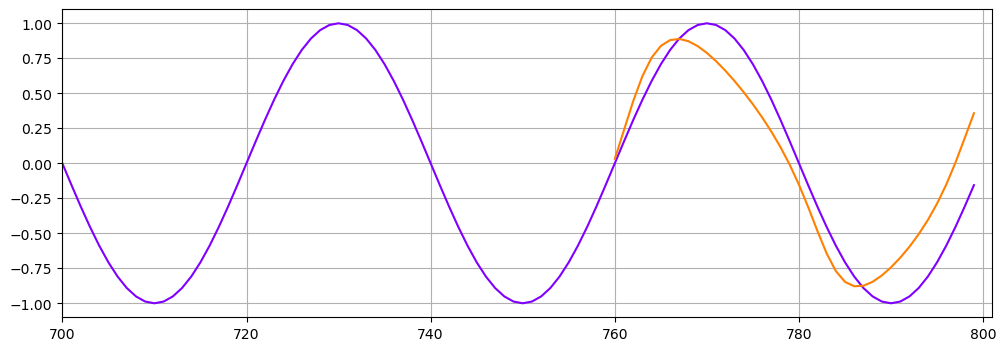

Epoch 11 Loss: 9.995034633902833e-05
Performance on test range: 0.060089267790317535


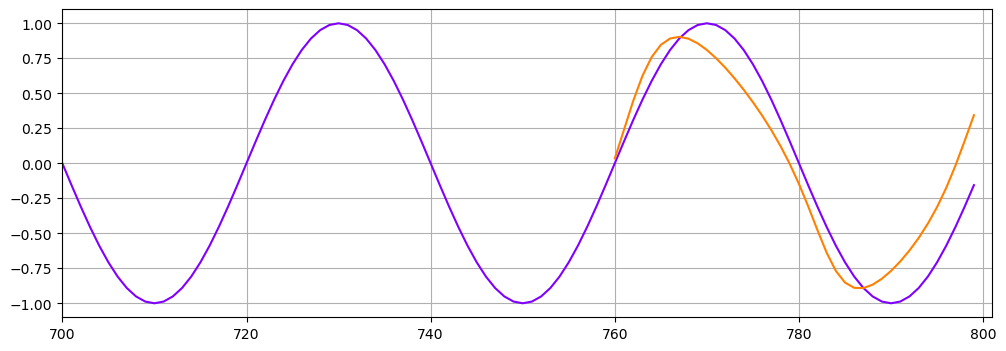

Epoch 12 Loss: 0.00018137009465135634
Performance on test range: 0.05593278259038925


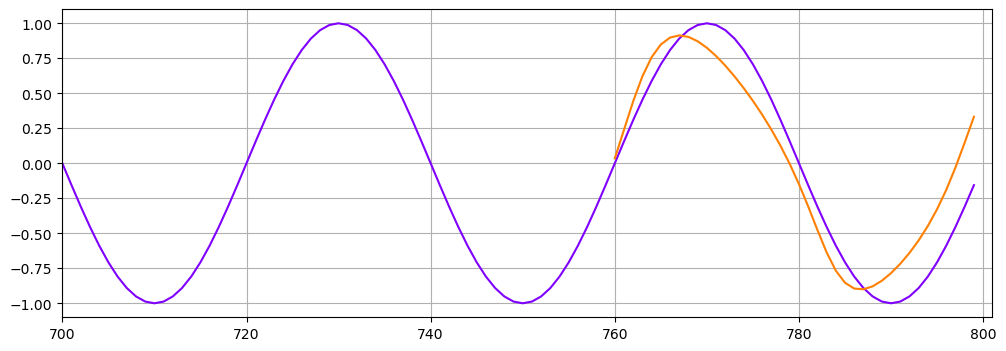

Epoch 13 Loss: 0.00024963292526081204
Performance on test range: 0.052044738084077835


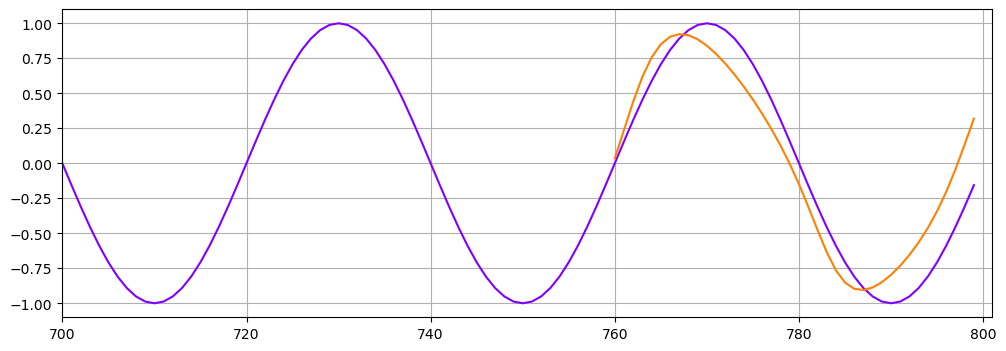

Epoch 14 Loss: 0.0003027702623512596
Performance on test range: 0.04811614751815796


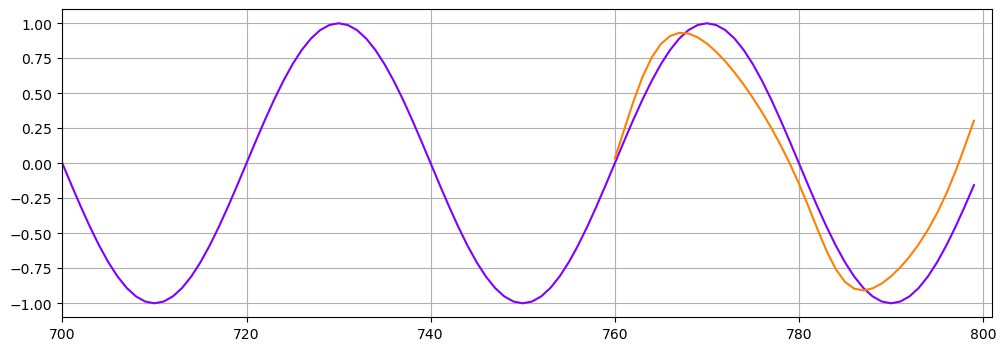

Epoch 15 Loss: 0.00034165591932833195
Performance on test range: 0.04425489157438278


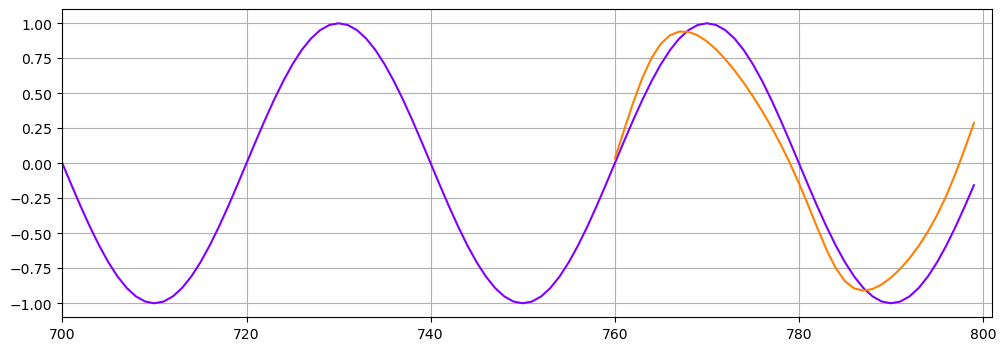

Epoch 16 Loss: 0.0003679152578115463
Performance on test range: 0.04060887545347214


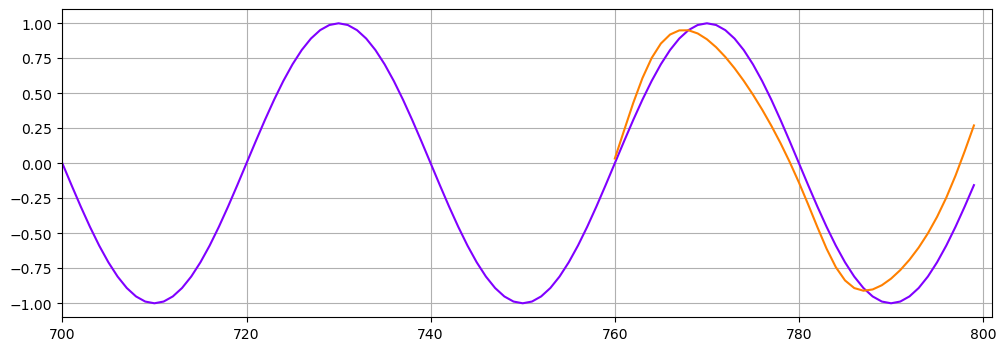

Epoch 17 Loss: 0.0003833439841400832
Performance on test range: 0.03722772002220154


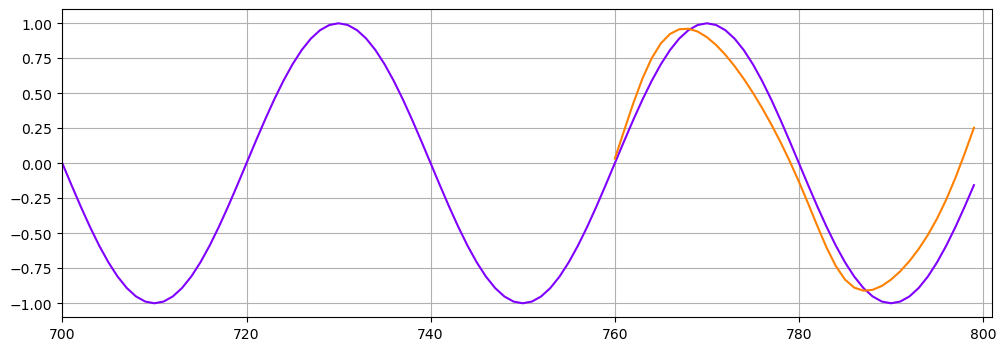

Epoch 18 Loss: 0.0003896981943398714
Performance on test range: 0.03412003070116043


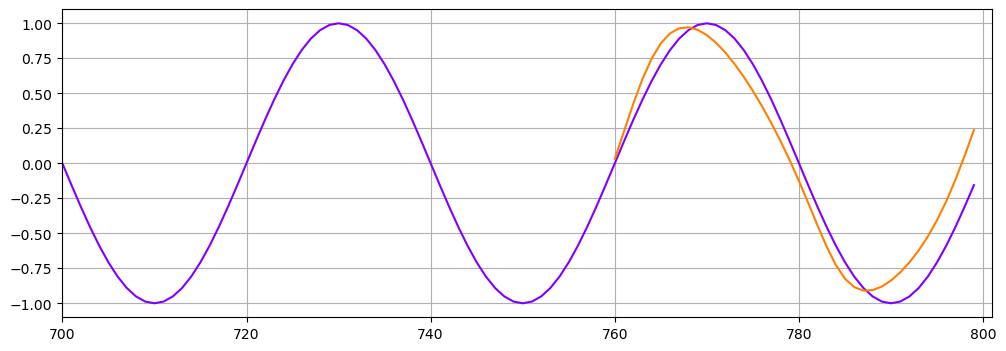

Epoch 19 Loss: 0.0003885917831212282
Performance on test range: 0.03125997260212898


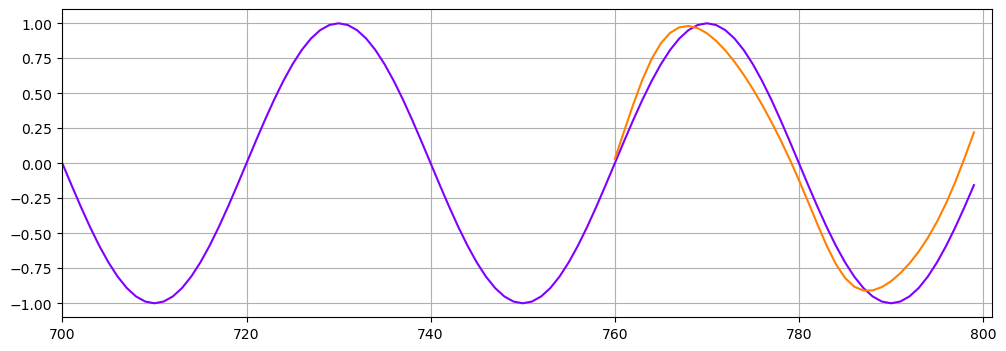

Epoch 20 Loss: 0.00038149883039295673
Performance on test range: 0.028622765094041824


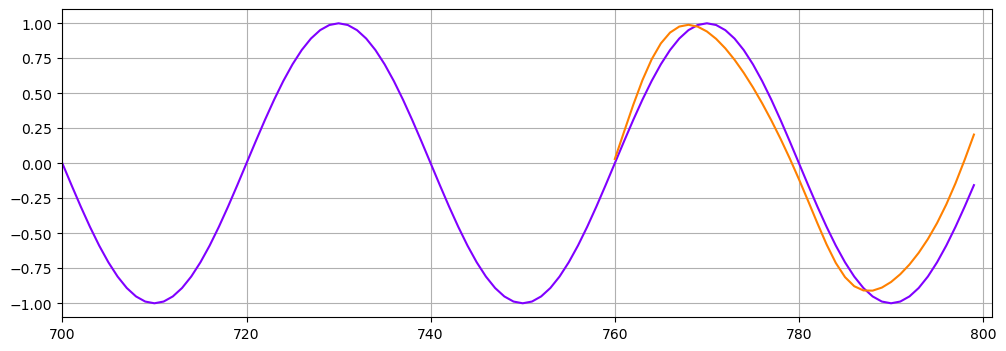

Epoch 21 Loss: 0.00036975767579860985
Performance on test range: 0.026170969009399414


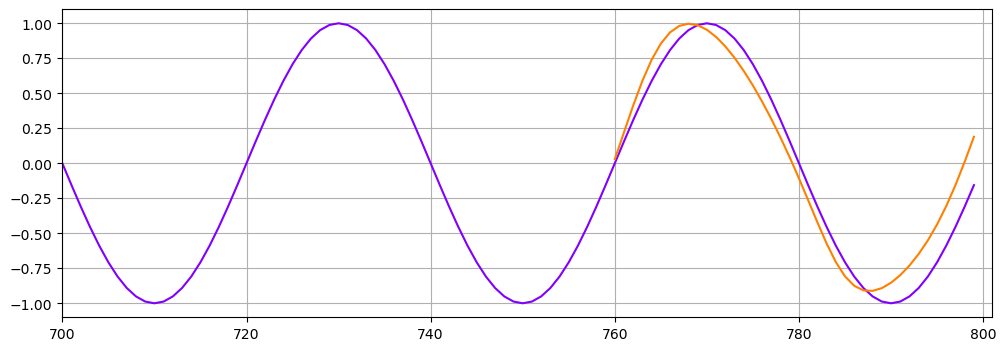

Epoch 22 Loss: 0.0003545347135514021
Performance on test range: 0.02388080209493637


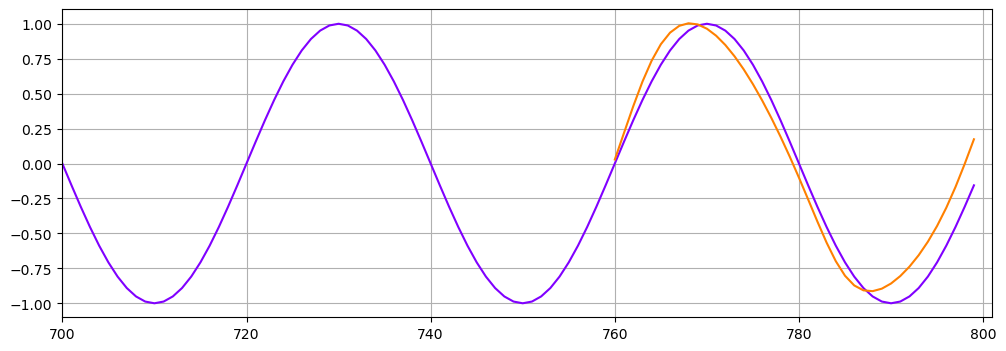

Epoch 23 Loss: 0.00033685340895317495
Performance on test range: 0.021740734577178955


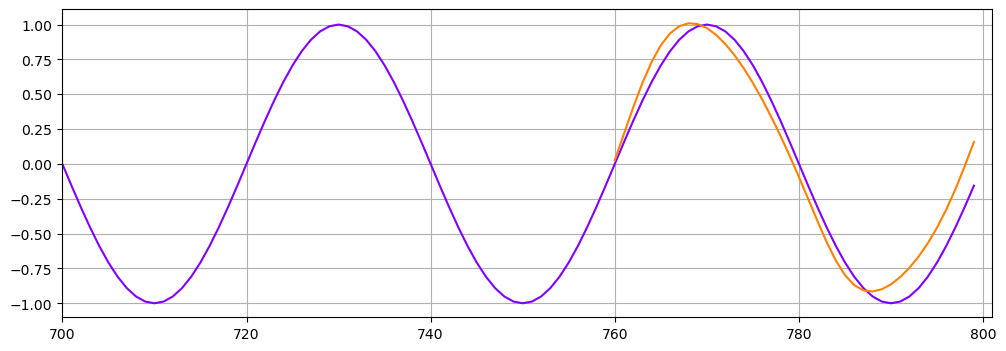

Epoch 24 Loss: 0.00031761350692249835
Performance on test range: 0.01973092555999756


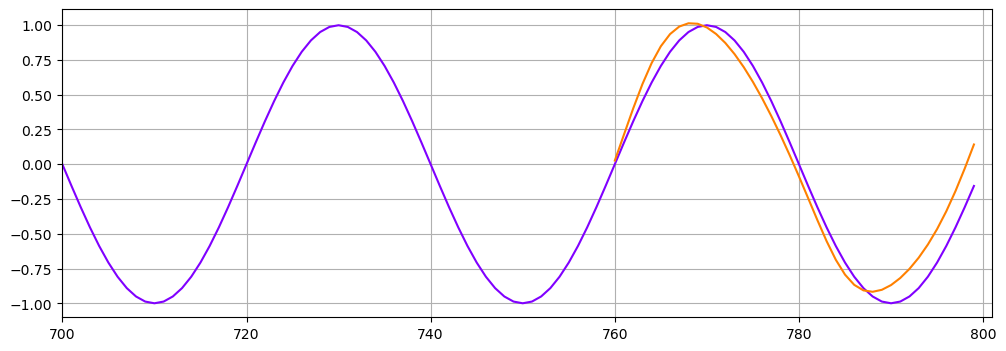

Epoch 25 Loss: 0.0002975348033942282
Performance on test range: 0.017855020239949226


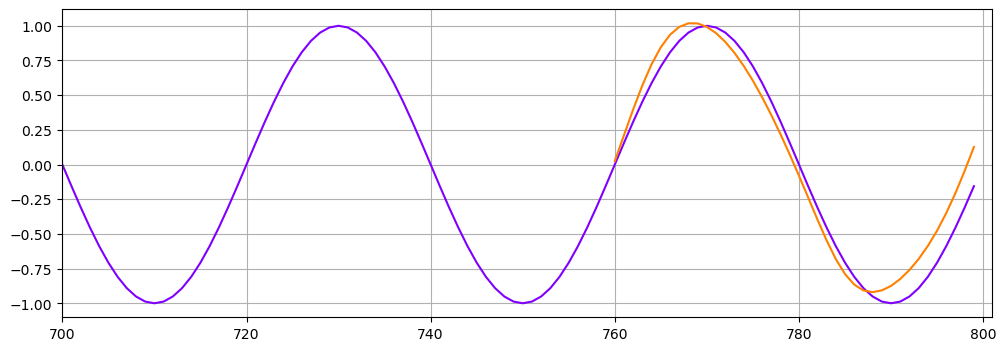

Epoch 26 Loss: 0.0002772380830720067
Performance on test range: 0.016108643263578415


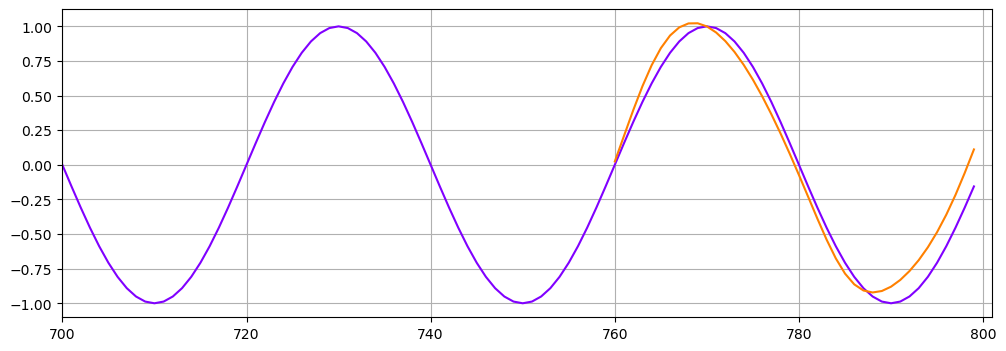

Epoch 27 Loss: 0.0002571887744124979
Performance on test range: 0.014491084031760693


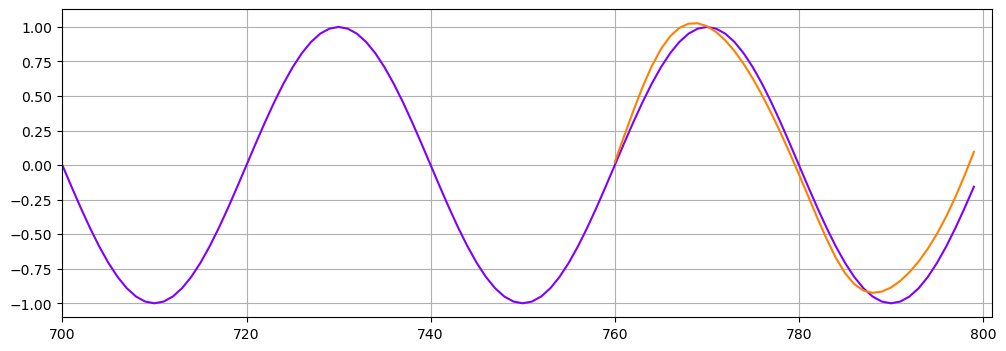

Epoch 28 Loss: 0.00023774529108777642
Performance on test range: 0.013004926033318043


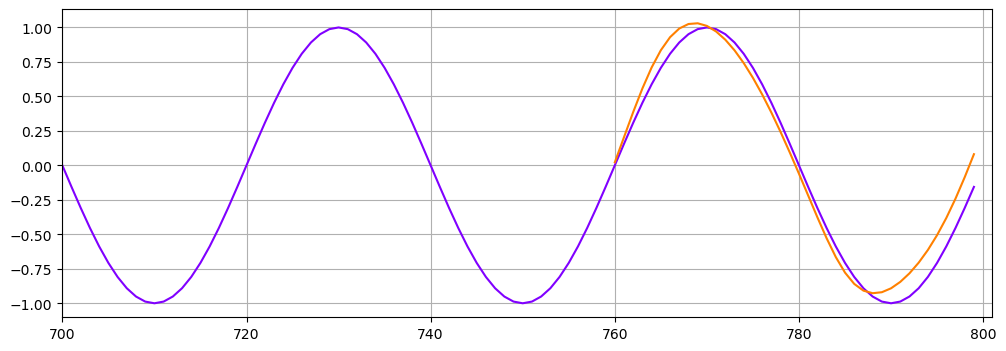

Epoch 29 Loss: 0.00021918505080975592
Performance on test range: 0.011645490303635597


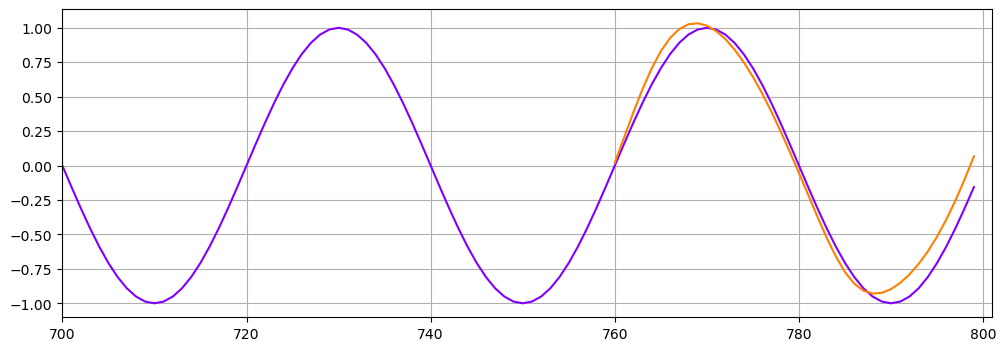

In [13]:
epochs = 30
future = 40

for i in range(epochs):
    
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                       torch.zeros(1,1,model.hidden_size))
        #print(seq.shape,y_train.shape)
        y_pred = model(seq)
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f"Epoch {i} Loss: {loss.item()}")
    
    preds = train_set[-window_size:].tolist()
    for f in range(future):
        seq = torch.FloatTensor(preds[-window_size:])
        with torch.no_grad():
            model.hidden = (torch.zeros(1,1,model.hidden_size),
                           torch.zeros(1,1,model.hidden_size))
            preds.append(model(seq).item())
        
    loss = criterion(torch.tensor(preds[-window_size:]), y[760:])
    print(f"Performance on test range: {loss}")
    
    plt.figure(figsize=(12,4))
    plt.xlim(700,801)
    plt.grid(True)
    plt.plot(y.numpy(),color='#8000ff')
    plt.plot(range(760,800),preds[window_size:],color='#ff8000')
    plt.show()

### 5. Alcohol Sales dataset <a id=13></a>
[back to top](#100)

#### 5.1 Loading and plotting <a id=14></a>

##### 5.1.1 Importing the data

In [14]:
df = pd.read_csv("Alcohol_Sales.csv", index_col = 0, parse_dates = True)
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


##### 5.1.2 Dropping the empty rows

In [15]:
df.dropna(inplace=True)
len(df)

325

##### 5.1.3 Plotting the Time Series Data

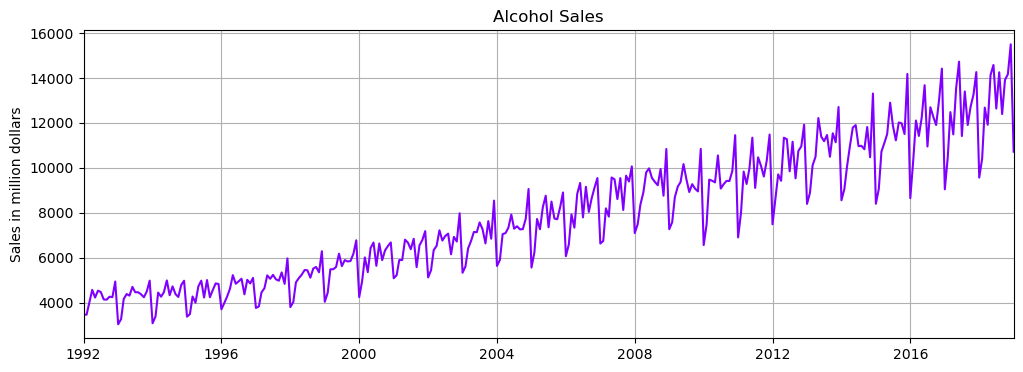

In [16]:
plt.figure(figsize = (12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'],color='#8000ff')
plt.show()

#### 5.2 Prepare and normalize <a id=15></a>

##### 5.2.1 Preparing the data

In [17]:
#extracting the time series values
y = df['S4248SM144NCEN'].values.astype(float) 

#defining a test size
test_size = 12

#create train and test splits
train_set = y[:-test_size]
test_set = y[-test_size:]
test_set

array([10415., 12683., 11919., 14138., 14583., 12640., 14257., 12396.,
       13914., 14174., 15504., 10718.])

##### 5.2.2 Normalize the data

In [18]:
from sklearn.preprocessing import MinMaxScaler

# instantiate a scaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# normalize the training set
train_norm = scaler.fit_transform(train_set.reshape(-1, 1))

##### 5.2.3 Prepare data for LSTM model

In [19]:
# convert train_norm to a tensor
train_norm = torch.FloatTensor(train_norm).view(-1)

# define a window size
window_size = 12
# define a function to create sequence/label tuples
def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

# apply input_data to train_norm
train_data = input_data(train_norm, window_size)
len(train_data)

301

##### 5.2.4 Printing the first tuple

In [20]:
train_data[0]

(tensor([-0.9268, -0.9270, -0.8340, -0.7379, -0.7966, -0.7439, -0.7547, -0.8109,
         -0.8128, -0.7901, -0.7933, -0.6743]),
 tensor([-1.]))

#### 5.3 Modelling <a id=16></a>

##### 5.3.1 Model definition

In [21]:
class LSTMnetwork(nn.Module):
    def __init__(self,input_size=1,hidden_size=100,output_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        
        # add an LSTM layer:
        self.lstm = nn.LSTM(input_size,hidden_size)
        
        # add a fully-connected layer:
        self.linear = nn.Linear(hidden_size,output_size)
        
        # initializing h0 and c0:
        self.hidden = (torch.zeros(1,1,self.hidden_size),
                       torch.zeros(1,1,self.hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(
            seq.view(len(seq),1,-1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]

##### 5.3.3 Instantiation, loss and optimizer

In [22]:
torch.manual_seed(42)

# instantiate
model = LSTMnetwork()

# loss
criterion = nn.MSELoss()

#optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

model

LSTMnetwork(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)

##### 5.3.4 Training

In [23]:
epochs = 100

import time
start_time = time.time()

for epoch in range(epochs):
    for seq, y_train in train_data:
        optimizer.zero_grad()
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        
        y_pred = model(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.26208416
Epoch:  2 Loss: 0.34071705
Epoch:  3 Loss: 0.37325224
Epoch:  4 Loss: 0.37144583
Epoch:  5 Loss: 0.32069430
Epoch:  6 Loss: 0.33051443
Epoch:  7 Loss: 0.32643330
Epoch:  8 Loss: 0.32497033
Epoch:  9 Loss: 0.30683756
Epoch: 10 Loss: 0.30106238
Epoch: 11 Loss: 0.29293543
Epoch: 12 Loss: 0.28600198
Epoch: 13 Loss: 0.29466835
Epoch: 14 Loss: 0.27528757
Epoch: 15 Loss: 0.29106069
Epoch: 16 Loss: 0.27637681
Epoch: 17 Loss: 0.28570893
Epoch: 18 Loss: 0.28756285
Epoch: 19 Loss: 0.26827058
Epoch: 20 Loss: 0.26683387
Epoch: 21 Loss: 0.26333287
Epoch: 22 Loss: 0.26538384
Epoch: 23 Loss: 0.25447318
Epoch: 24 Loss: 0.27008516
Epoch: 25 Loss: 0.13405015
Epoch: 26 Loss: 0.00002776
Epoch: 27 Loss: 0.00113227
Epoch: 28 Loss: 0.00001876
Epoch: 29 Loss: 0.00256083
Epoch: 30 Loss: 0.00113120
Epoch: 31 Loss: 0.00001310
Epoch: 32 Loss: 0.00000471
Epoch: 33 Loss: 0.00035257
Epoch: 34 Loss: 0.00008106
Epoch: 35 Loss: 0.00009132
Epoch: 36 Loss: 0.00402230
Epoch: 37 Loss: 0.01251825
E

#### 5.4 Predictions <a id=17></a>

##### 5.4.1 Test set predictions

In [24]:
future = 12

preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1,1,model.hidden_size),
                        torch.zeros(1,1,model.hidden_size))
        preds.append(model(seq).item())
preds[window_size:]

[0.49661925435066223,
 0.5924646854400635,
 0.584254264831543,
 0.7883567810058594,
 1.0312211513519287,
 0.46857306361198425,
 0.7241657972335815,
 0.6063885688781738,
 0.6665273904800415,
 0.7775094509124756,
 1.039047360420227,
 0.14090271294116974]

##### 5.4.2 Original test set

In [25]:
df['S4248SM144NCEN'][-12:]

DATE
2018-02-01    10415
2018-03-01    12683
2018-04-01    11919
2018-05-01    14138
2018-06-01    14583
2018-07-01    12640
2018-08-01    14257
2018-09-01    12396
2018-10-01    13914
2018-11-01    14174
2018-12-01    15504
2019-01-01    10718
Name: S4248SM144NCEN, dtype: int64

##### 5.4.3 Inverting the normalised values

In [26]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[11785.47432832],
       [12346.12217748],
       [12298.09532213],
       [13491.99299049],
       [14912.62812483],
       [11621.4181356 ],
       [13116.50783092],
       [12427.56993365],
       [12779.35197061],
       [13428.54153311],
       [14958.40753478],
       [ 9704.71041935]])

##### 5.4.4 Plotting

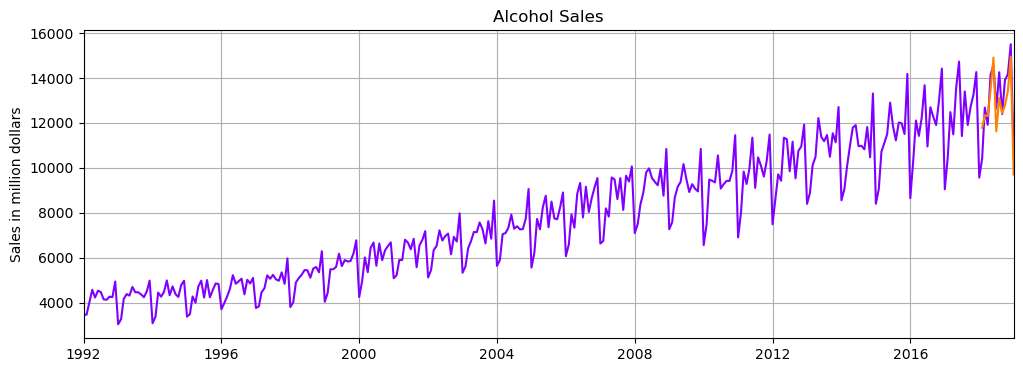

In [27]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')
plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['S4248SM144NCEN'], color='#8000ff')
plt.plot(x,true_predictions, color='#ff8000')
plt.show()

##### 5.5.5 Zooming the test predictions

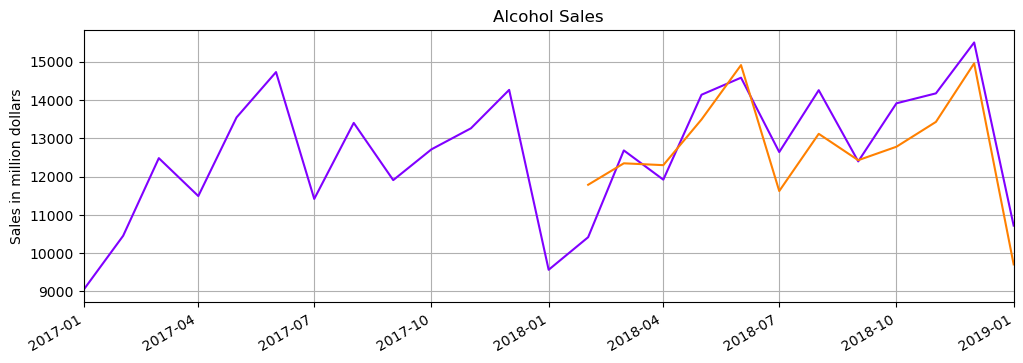

In [28]:
fig = plt.figure(figsize=(12,4))
plt.title('Alcohol Sales')
plt.ylabel('Sales in million dollars')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()

plt.plot(df['S4248SM144NCEN']['2017-01-01':], color='#8000ff')
plt.plot(x,true_predictions, color='#ff8000')
plt.show()

### If you liked the notebook, consider giving an upvote.
[back to top](#100)